In [1]:
# 导入相关库
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import DataFrame
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv('./data/kaggle_house/train.csv')

In [3]:
raw_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
raw_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
# 数值数据的列
numeric_colmuns = []
numeric_colmuns.extend(list(raw_data.dtypes[raw_data.dtypes == np.int64].index))
numeric_colmuns.extend(list(raw_data.dtypes[raw_data.dtypes == np.float64].index))

In [6]:
numeric_colmuns

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'LotFrontage',
 'MasVnrArea',
 'GarageYrBlt']

In [7]:
# 将SalePrice放在最后一列
numeric_colmuns.remove('SalePrice')
numeric_colmuns.append('SalePrice')

In [8]:
# 去除Id这一列
numeric_colmuns.remove('Id')

In [9]:
numeric_data = DataFrame(raw_data, columns=numeric_colmuns)

In [10]:
 numeric_data.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000,1452.000000,1379.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,1057.429452,...,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,70.049958,103.685262,1978.506164,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,438.705324,...,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,24.284752,181.066207,24.689725,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,21.000000,0.000000,1900.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,59.000000,0.000000,1961.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,991.500000,...,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,69.000000,0.000000,1980.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,1298.250000,...,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,80.000000,166.000000,2002.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,313.000000,1600.000000,2010.000000,755000.000000


In [11]:
numeric_data.head(10)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,0,0,0,2,2008,65.0,196.0,2003.0,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,0,0,0,0,5,2007,80.0,0.0,1976.0,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,0,0,0,9,2008,68.0,162.0,2001.0,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,0,0,0,2,2006,60.0,0.0,1998.0,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,0,0,0,0,12,2008,84.0,350.0,2000.0,250000
5,50,14115,5,5,1993,1995,732,0,64,796,...,320,0,0,700,10,2009,85.0,0.0,1993.0,143000
6,20,10084,8,5,2004,2005,1369,0,317,1686,...,0,0,0,0,8,2007,75.0,186.0,2004.0,307000
7,60,10382,7,6,1973,1973,859,32,216,1107,...,0,0,0,350,11,2009,NaN,240.0,1973.0,200000
8,50,6120,7,5,1931,1950,0,0,952,952,...,0,0,0,0,4,2008,51.0,0.0,1931.0,129900
9,190,7420,5,6,1939,1950,851,0,140,991,...,0,0,0,0,1,2008,50.0,0.0,1939.0,118000


In [12]:
# numpy.all()函数 与 numpy.any()函数
# https://blog.csdn.net/weixin_40522801/article/details/106463133
# all()函数用于判断整个数组中的元素的值是否全部满足条件，如果满足条件返回True，否则返回False。本质上讲，all()实现了或(AND)运算
# np.array.any()是或操作，任意一个元素为True，输出为True。本质上讲，any()实现了或(OR)运算。
# pd.isna 检查缺省值
# https://blog.csdn.net/tcy23456/article/details/85834380
nan_columns = np.any(pd.isna(numeric_data), axis = 0)
nan_columns = list(nan_columns[nan_columns == True].index)# 返回有缺省值的列的索引

In [13]:
nan_columns

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [14]:
# 缺省值补0
# pd.fillna(n)填充缺失数据
numeric_data['LotFrontage'] = numeric_data['LotFrontage'].fillna(0)
numeric_data['MasVnrArea'] = numeric_data['MasVnrArea'].fillna(0)
numeric_data['GarageYrBlt'] = numeric_data['GarageYrBlt'].fillna(0)

In [15]:
# 检查是否还有缺失数据
nan_columns = np.any(pd.isna(numeric_data), axis = 0)
nan_columns = list(nan_columns[nan_columns == True].index)

In [16]:
nan_columns

[]

In [17]:
# 线性回归模型

In [18]:
import torch
import torch.nn as nn

In [19]:
numeric_x_columns = list(numeric_data.columns)
numeric_x_columns.remove('SalePrice')
numeric_y_columns = ['SalePrice']

In [20]:
# 输入数据有哪些列
numeric_x_columns

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'LotFrontage',
 'MasVnrArea',
 'GarageYrBlt']

In [21]:
numeric_x_df = DataFrame(numeric_data, columns=numeric_x_columns)
numeric_y_df = DataFrame(numeric_data, columns=numeric_y_columns)

In [22]:
# 将输入输出数据转化为tensor
numeric_x = torch.tensor(numeric_x_df.values, dtype=torch.float)
numeric_y = torch.tensor(numeric_y_df.values, dtype=torch.float)

In [23]:
numeric_x.shape

torch.Size([1460, 36])

In [24]:
torch.Size([1460, 1])

torch.Size([1460, 1])

In [25]:
# 模型
class Net(nn.Module):
    def __init__(self, D_in, H1, H2, H3, D_out):
        # D_in, H1, H2, H3, D_out  --  输入维度 第一层输出维度 第二层输出维度 第三层输出维度 最终输出维度
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, H3)
        self.linear4 = nn.Linear(H3, D_out)
        
    def forward(self, x):
        # torch.clamp() 将张量的每个元素范围限制到一个(min, max)
        y = self.linear1(x).clamp(min=0)
        y = self.linear2(y).clamp(min=0)
        y = self.linear3(y).clamp(min=0)
        y = self.linear4(y)
        return y

In [26]:
H1, H2, H3 = 500, 1000, 200

In [27]:
D_in, D_out = numeric_x.shape[1], numeric_y.shape[1]

In [28]:
print(D_in, D_out)

36 1


In [29]:
model1 = Net(D_in, H1, H2, H3, D_out)

In [30]:
model1

Net(
  (linear1): Linear(in_features=36, out_features=500, bias=True)
  (linear2): Linear(in_features=500, out_features=1000, bias=True)
  (linear3): Linear(in_features=1000, out_features=200, bias=True)
  (linear4): Linear(in_features=200, out_features=1, bias=True)
)

In [31]:
# 损失函数 torch.nn.MSELoss https://blog.csdn.net/qq_29631521/article/details/101374798
criterion = nn.MSELoss(reduction='sum')# 返回损失之和

In [32]:
# 优化器
optimizer = torch.optim.SGD(model1.parameters(), lr=1e-4)

In [33]:
losses1 = []

for t in range(500):
    y_pred = model1(numeric_x)
    
    loss = criterion(y_pred, numeric_y)
    print(t, loss.item())
    losses1.append(loss.item())
    
    if torch.isnan(loss):
        break
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 57013258158080.0
1 inf
2 nan


In [34]:
# 可以看到损失值到了无穷 
# 下面对输入数据进行归一化

In [35]:
# 均值 最大值 最小值
means, maxs, mins = dict(), dict(), dict()

In [36]:
for col in numeric_data:
    means[col] = numeric_data[col].mean()
    maxs[col] = numeric_data[col].max()
    mins[col] = numeric_data[col].min()

In [37]:
numeric_data = (numeric_data - numeric_data.mean()) / (numeric_data.max() - numeric_data.min())

In [38]:
numeric_x_df = DataFrame(numeric_data, columns=numeric_x_columns)
numeric_y_df = DataFrame(numeric_data, columns=numeric_y_columns)

In [39]:
numeric_x = torch.tensor(numeric_x_df.values, dtype=torch.float)
numeric_y = torch.tensor(numeric_y_df.values, dtype=torch.float)

In [40]:
model2 = Net(D_in, H1, H2, H3, D_out)

In [41]:
criterion = nn.MSELoss(reduction='sum')

In [42]:
optimizer = torch.optim.SGD(model2.parameters(), lr=1e-4)

In [43]:
losses2 = []

for t in range(500):
    y_pred = model2(numeric_x)
    
    loss = criterion(y_pred, numeric_y)
    if (t + 1) % 10 == 0:
        print(t, loss.item())
    losses2.append(loss.item())
    
    if torch.isnan(loss):
        break
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

9 16.026159286499023
19 14.760993957519531
29 13.54930305480957
39 12.397201538085938
49 11.261592864990234
59 10.17422103881836
69 9.186515808105469
79 8.310215950012207
89 7.552971839904785
99 6.9146575927734375
109 6.389770030975342
119 5.964062213897705
129 5.620397090911865
139 5.341961860656738
149 5.1141228675842285
159 4.923928737640381
169 4.7614359855651855
179 4.620135307312012
189 4.49472713470459
199 4.381895065307617
209 4.279447078704834
219 4.185790061950684
229 4.099416255950928
239 4.019481182098389
249 3.9453964233398438
259 3.8763718605041504
269 3.8114356994628906
279 3.7501792907714844
289 3.6923065185546875
299 3.6374502182006836
309 3.5858075618743896
319 3.5370707511901855
329 3.490769386291504
339 3.4467811584472656
349 3.4050300121307373
359 3.365529775619507
369 3.32810378074646
379 3.292795181274414
389 3.2595250606536865
399 3.228041172027588
409 3.198133945465088
419 3.169853925704956
429 3.1429367065429688
439 3.117324113845825
449 3.092939853668213
459 

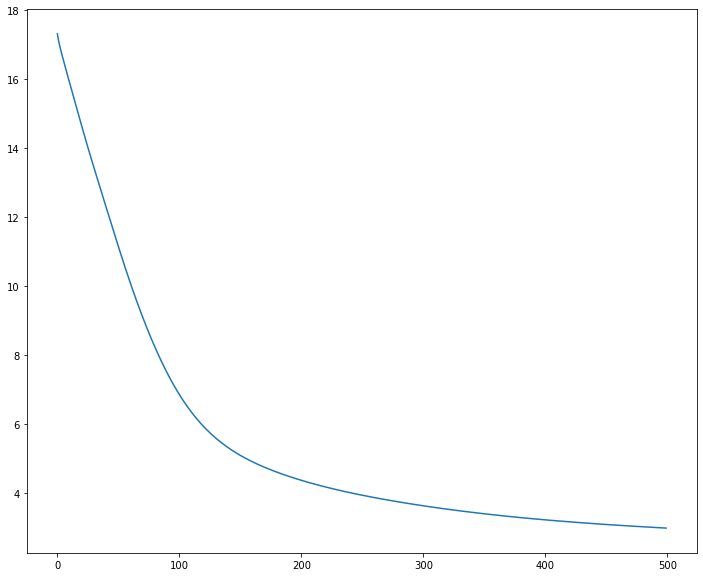

In [44]:
# 从图表看一下损失值的变化
plt.figure(figsize=(12, 10))
plt.plot(range(len(losses2)), losses2)
plt.show()

In [45]:
# 比第一次模型要好 但是损失值还是有点高

In [46]:
model3 = Net(D_in, H1, H2, H3, D_out)
optimizer = torch.optim.SGD(model3.parameters(), lr=1e-4 * 2)# 继续调低学习率

In [47]:
losses3 = []

for t in range(500):
    y_pred = model3(numeric_x)
    
    loss = criterion(y_pred, numeric_y)
    if (t + 1) % 10 == 0:
        print(t, loss.item())
    losses3.append(loss.item())
    
    if torch.isnan(loss):
        break
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

9 14.480055809020996
19 11.707169532775879
29 9.390344619750977
39 7.656149864196777
49 6.4931440353393555
59 5.745871067047119
69 5.242308616638184
79 4.86836051940918
89 4.568615436553955
99 4.317434787750244
109 4.105839252471924
119 3.928401231765747
129 3.7779548168182373
139 3.6493661403656006
149 3.5386152267456055
159 3.442145824432373
169 3.358189105987549
179 3.284428358078003
189 3.218653678894043
199 3.1596994400024414
209 3.1066577434539795
219 3.058995246887207
229 3.0159077644348145
239 2.976391553878784
249 2.940119504928589
259 2.9066333770751953
269 2.8754372596740723
279 2.846193313598633
289 2.818462371826172
299 2.792229413986206
309 2.767211675643921
319 2.7431907653808594
329 2.7203454971313477
339 2.6985347270965576
349 2.677644968032837
359 2.6576247215270996
369 2.63834285736084
379 2.6197569370269775
389 2.6017422676086426
399 2.584275484085083
409 2.567275285720825
419 2.550748348236084
429 2.534691572189331
439 2.5190834999084473
449 2.5038552284240723
459 

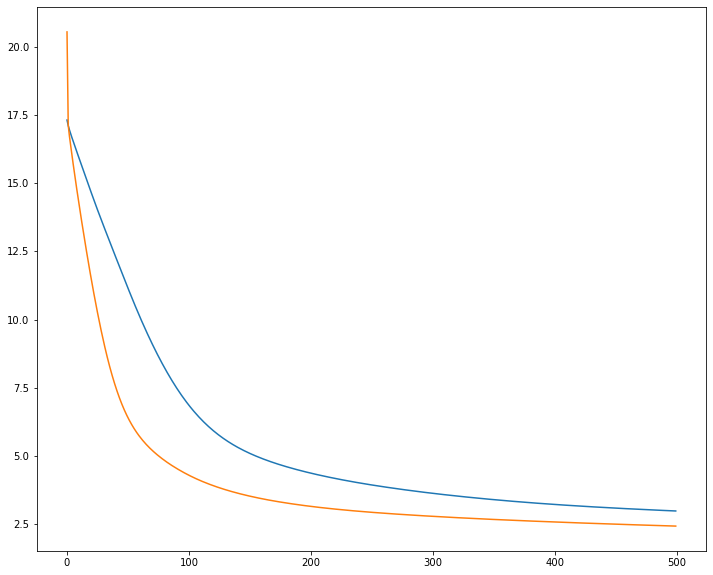

In [48]:
plt.figure(figsize=(12, 10))
plt.plot(range(len(losses2)), losses2)
plt.plot(range(len(losses3)), losses3)
plt.show()

In [49]:
model4 = Net(D_in, H1, H2, H3, D_out)
optimizer = torch.optim.Adam(model4.parameters(), lr=1e-4 * 2)# 换一个优化器

In [50]:
losses4 = []

for t in range(500):
    y_pred = model4(numeric_x)
    
    loss = criterion(y_pred, numeric_y)
    if (t + 1) % 10 == 0:
        print(t, loss.item())
    losses4.append(loss.item())
    
    if torch.isnan(loss):
        break
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

9 5.136964797973633
19 3.0729918479919434
29 2.5758121013641357
39 2.1138882637023926
49 1.7599902153015137
59 1.445847749710083
69 1.179697036743164
79 0.9578662514686584
89 0.7848576307296753
99 0.6505900621414185
109 0.543756365776062
119 0.46308115124702454
129 0.39019766449928284
139 0.3328038156032562
149 0.2947167158126831
159 0.24226735532283783
169 0.20945043861865997
179 0.18149785697460175
189 0.15927457809448242
199 0.14294782280921936
209 0.12922759354114532
219 0.12701931595802307
229 0.11361128091812134
239 0.09636184573173523
249 0.0804450586438179
259 0.08008722215890884
269 0.08442740142345428
279 0.06824121624231339
289 0.055291201919317245
299 0.07242021709680557
309 0.0599968321621418
319 0.044995859265327454
329 0.05526065453886986
339 0.050802573561668396
349 0.03650014102458954
359 0.054077379405498505
369 0.041519712656736374
379 0.034895509481430054
389 0.029274871572852135
399 0.04015030711889267
409 0.025074509903788567
419 0.023319832980632782
429 0.0218153

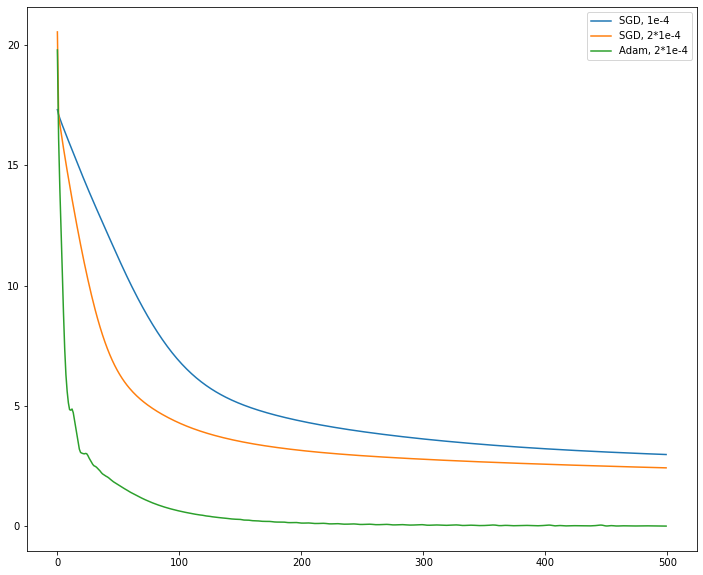

In [51]:
plt.figure(figsize=(12, 10))
plt.plot(range(len(losses2)), losses2, label='SGD, 1e-4')
plt.plot(range(len(losses3)), losses3, label='SGD, 2*1e-4')
plt.plot(range(len(losses4)), losses4, label = 'Adam, 2*1e-4')

plt.legend(loc='upper right')
plt.show()

In [52]:
# 将原始数据中非数值数据的列找出来
non_numeric_columns = [col for col in list(raw_data.columns) if col not in numeric_colmuns]
non_numeric_columns.remove('Id')

non_numeric_columns

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [53]:
# 非数值数据
non_numeric_data = DataFrame(raw_data, columns=non_numeric_columns)

In [54]:
non_numeric_data.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [55]:
non_numeric_data.head(10)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
5,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,Shed,WD,Normal
6,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
7,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,...,Attchd,RFn,TA,TA,Y,NaN,NaN,Shed,WD,Normal
8,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,...,Detchd,Unf,Fa,TA,Y,NaN,NaN,NaN,WD,Abnorml
9,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,...,Attchd,RFn,Gd,TA,Y,NaN,NaN,NaN,WD,Normal


In [56]:
nan_columns = np.any(pd.isna(non_numeric_data), axis=0)
nan_columns = list(nan_columns[nan_columns == True].index)

In [57]:
nan_columns

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [58]:
# 将缺失值作为 'N/A'
for col in nan_columns:
    non_numeric_data[col] = non_numeric_data[col].fillna('N/A')

In [59]:
nan_columns = np.any(pd.isna(non_numeric_data), axis = 0)
nan_columns = list(nan_columns[nan_columns == True].index)

In [60]:
nan_columns

[]

In [61]:
# 用映射表把字符串转为int
mapping_table = dict()

for col in non_numeric_columns:
    curr_mapping_table = dict()
    
    unique_values = pd.unique(non_numeric_data[col])
    print(unique_values)
    for inx, v in enumerate(unique_values):
        curr_mapping_table[v] = inx + 1
        non_numeric_data[col] = non_numeric_data[col].replace(v, inx + 1)
    
    mapping_table[col] = curr_mapping_table

['RL' 'RM' 'C (all)' 'FV' 'RH']
['Pave' 'Grvl']
['N/A' 'Grvl' 'Pave']
['Reg' 'IR1' 'IR2' 'IR3']
['Lvl' 'Bnk' 'Low' 'HLS']
['AllPub' 'NoSeWa']
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
['Gtl' 'Mod' 'Sev']
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
['VinylSd' 'MetalSd' 'Wd Sh

In [62]:
non_numeric_data.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,2,1,2,2,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,2,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,2,1,1,3,1,3,1,...,2,2,1,1,1,1,1,1,1,2
4,1,1,1,2,1,1,2,1,4,1,...,1,1,1,1,1,1,1,1,1,1


In [66]:
non_numeric_data.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000
mean,1.340411,1.004110,1.090411,1.408219,1.195205,1.000685,1.596575,1.062329,10.478082,1.383562,...,1.715753,2.063014,1.236986,1.179452,1.102740,1.010274,1.332877,1.043151,1.234932,1.35000
std,0.798309,0.063996,0.372151,0.582296,0.642010,0.026171,1.010359,0.276232,5.837783,1.208607,...,1.187967,0.865215,0.773978,0.616755,0.365201,0.158916,0.793316,0.245984,0.804553,0.88787
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
75%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,14.000000,1.000000,...,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
max,5.000000,2.000000,3.000000,4.000000,4.000000,2.000000,5.000000,3.000000,25.000000,9.000000,...,7.000000,4.000000,6.000000,6.000000,3.000000,4.000000,5.000000,5.000000,9.000000,6.00000


In [63]:
# 归一化
for col in non_numeric_data:
    means[col] = non_numeric_data[col].mean()
    maxs[col] = non_numeric_data[col].max()
    mins[col] = non_numeric_data[col].min()

In [64]:
for col in non_numeric_data:
    print(means[col], maxs[col], mins[col])

1.3404109589041096 5 1
1.0041095890410958 2 1
1.0904109589041096 3 1
1.4082191780821918 4 1
1.1952054794520548 4 1
1.0006849315068493 2 1
1.5965753424657534 5 1
1.0623287671232877 3 1
10.478082191780821 25 1
1.3835616438356164 9 1
1.0342465753424657 8 1
1.4445205479452055 5 1
2.1445205479452056 8 1
1.2678082191780822 6 1
1.0650684931506849 8 1
3.2034246575342467 15 1
3.532191780821918 16 1
1.8198630136986302 5 1
1.7205479452054795 4 1
1.1486301369863015 5 1
1.7267123287671233 6 1
1.7821917808219179 5 1
1.1931506849315068 5 1
1.8061643835616439 5 1
2.8493150684931505 7 1
1.4767123287671233 7 1
1.039041095890411 6 1
1.8547945205479452 5 1
1.0650684931506849 2 1
1.1595890410958904 6 1
1.7205479452054795 4 1
1.1726027397260275 7 1
1.936986301369863 6 1
1.7157534246575343 7 1
2.063013698630137 4 1
1.236986301369863 6 1
1.1794520547945206 6 1
1.1027397260273972 3 1
1.0102739726027397 4 1
1.332876712328767 5 1
1.0431506849315069 5 1
1.234931506849315 9 1
1.35 6 1


In [67]:
# minVal = 0.01
# 下面这条注释掉的代码会使得jupyter notebook服务断开
#non_numeric_data = (non_numeric_data - non_numeric_data.mean()) / (non_numeric_data.max() - non_numeric_data.min())# 防止分母为0
for col in non_numeric_data:
    non_numeric_data[col] = (non_numeric_data[col] - means[col]) / (maxs[col] - mins[col])

In [68]:
non_numeric_data.head(10)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,-0.085103,-0.00411,-0.045205,-0.136073,-0.065068,-0.000685,-0.149144,-0.031164,-0.394920,-0.047945,...,-0.119292,-0.354338,-0.047397,-0.03589,-0.05137,-0.003425,-0.083219,-0.010788,-0.029366,-0.07
1,-0.085103,-0.00411,-0.045205,-0.136073,-0.065068,-0.000685,0.100856,-0.031164,-0.353253,0.077055,...,-0.119292,-0.354338,-0.047397,-0.03589,-0.05137,-0.003425,-0.083219,-0.010788,-0.029366,-0.07
2,-0.085103,-0.00411,-0.045205,0.197260,-0.065068,-0.000685,-0.149144,-0.031164,-0.394920,-0.047945,...,-0.119292,-0.354338,-0.047397,-0.03589,-0.05137,-0.003425,-0.083219,-0.010788,-0.029366,-0.07
3,-0.085103,-0.00411,-0.045205,0.197260,-0.065068,-0.000685,0.350856,-0.031164,-0.311587,-0.047945,...,0.047374,-0.021005,-0.047397,-0.03589,-0.05137,-0.003425,-0.083219,-0.010788,-0.029366,0.13
4,-0.085103,-0.00411,-0.045205,0.197260,-0.065068,-0.000685,0.100856,-0.031164,-0.269920,-0.047945,...,-0.119292,-0.354338,-0.047397,-0.03589,-0.05137,-0.003425,-0.083219,-0.010788,-0.029366,-0.07
5,-0.085103,-0.00411,-0.045205,0.197260,-0.065068,-0.000685,-0.149144,-0.031164,-0.228253,-0.047945,...,-0.119292,-0.021005,-0.047397,-0.03589,-0.05137,-0.003425,0.166781,0.239212,-0.029366,-0.07
6,-0.085103,-0.00411,-0.045205,-0.136073,-0.065068,-0.000685,-0.149144,-0.031164,-0.186587,-0.047945,...,-0.119292,-0.354338,-0.047397,-0.03589,-0.05137,-0.003425,-0.083219,-0.010788,-0.029366,-0.07
7,-0.085103,-0.00411,-0.045205,0.197260,-0.065068,-0.000685,0.350856,-0.031164,-0.144920,0.202055,...,-0.119292,-0.354338,-0.047397,-0.03589,-0.05137,-0.003425,-0.083219,0.239212,-0.029366,-0.07
8,0.164897,-0.00411,-0.045205,-0.136073,-0.065068,-0.000685,-0.149144,-0.031164,-0.103253,0.327055,...,0.047374,-0.021005,0.152603,-0.03589,-0.05137,-0.003425,-0.083219,-0.010788,-0.029366,0.13
9,-0.085103,-0.00411,-0.045205,-0.136073,-0.065068,-0.000685,0.350856,-0.031164,-0.061587,0.327055,...,-0.119292,-0.354338,0.352603,-0.03589,-0.05137,-0.003425,-0.083219,-0.010788,-0.029366,-0.07


In [69]:
non_numeric_x_df = DataFrame(non_numeric_data, columns=non_numeric_columns)
non_numeric_y_df = DataFrame(numeric_y_df)

In [70]:
non_numeric_x = torch.tensor(non_numeric_x_df.values, dtype=torch.float)
non_numeric_y = torch.tensor(non_numeric_y_df.values, dtype=torch.float)

In [75]:
# 使用非数值数据的那些列来训练这个模型

In [71]:
D_in, D_out = non_numeric_x.shape[1], non_numeric_y.shape[1]

In [72]:
model5 = Net(D_in, H1, H2, H3, D_out)
optimizer = torch.optim.Adam(model5.parameters(), lr=1e-4 * 2)

In [73]:
losses5 = []

for t in range(500):
    y_pred = model5(non_numeric_x)
    
    loss = criterion(y_pred, non_numeric_y)
    if (t + 1) % 10 == 0:
        print(t, loss.item())
    losses5.append(loss.item())
    
    if torch.isnan(loss):
        break
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

9 12.829225540161133
19 9.36627197265625
29 7.438801288604736
39 6.169702529907227
49 5.025290489196777
59 4.038614749908447
69 3.1409335136413574
79 2.3690316677093506
89 1.7610877752304077
99 1.3221997022628784
109 1.0451769828796387
119 0.8242566585540771
129 0.6493556499481201
139 0.5345816612243652
149 0.44068533182144165
159 0.3785889744758606
169 0.3000623881816864
179 0.2604713439941406
189 0.21782830357551575
199 0.18533633649349213
209 0.23234820365905762
219 0.15443108975887299
229 0.12390366941690445
239 0.10940404236316681
249 0.09701061248779297
259 0.08604276180267334
269 0.07518934458494186
279 0.18017718195915222
289 0.12532274425029755
299 0.05744297429919243
309 0.06496372818946838
319 0.04729792848229408
329 0.043057236820459366
339 0.03948744386434555
349 0.03621388599276543
359 0.033069413155317307
369 0.03288336843252182
379 0.0649721696972847
389 0.03620615601539612
399 0.02456570789217949
409 0.04532922804355621
419 0.02131687104701996
429 0.055882252752780914


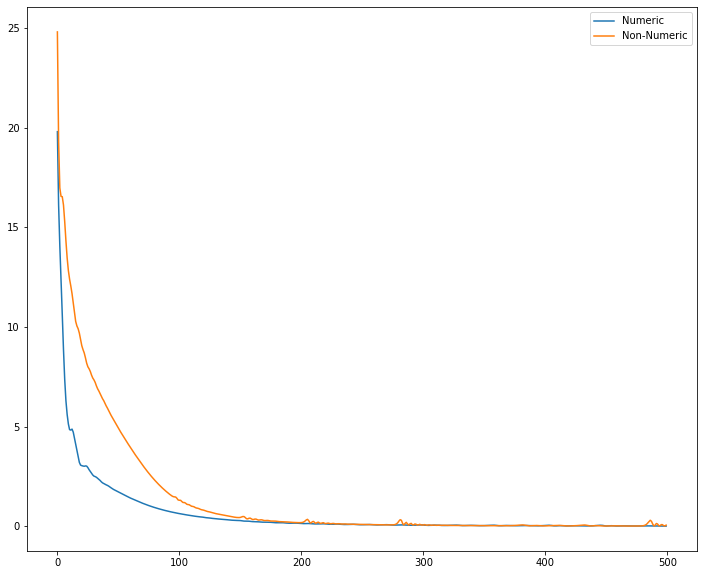

In [74]:
plt.figure(figsize=(12, 10))
plt.plot(range(len(losses4)), losses4, label = 'Numeric')
plt.plot(range(len(losses5)), losses5, label = 'Non-Numeric')

plt.legend(loc='upper right')
plt.show()
# 可以看到非数值列训练结果最后的损失存在波动

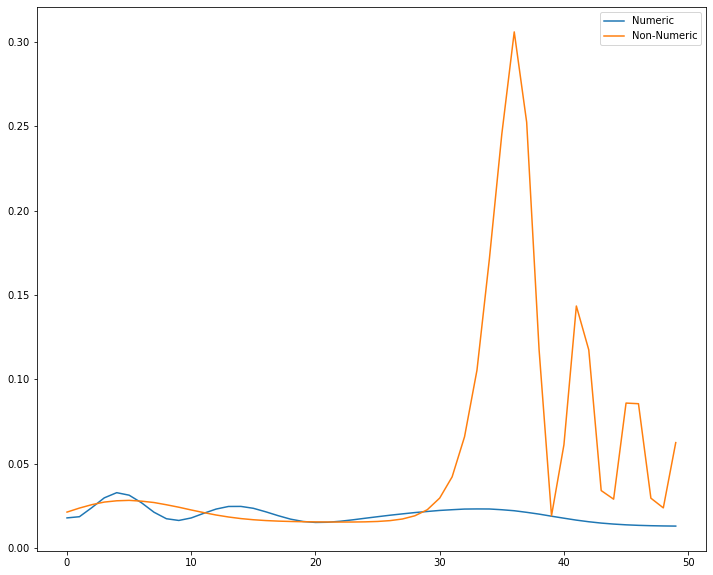

In [76]:
plt.figure(figsize=(12, 10))
plt.plot(range(len(losses4[-50:])), losses4[-50:], label = 'Numeric')
plt.plot(range(len(losses5[-50:])), losses5[-50:], label = 'Non-Numeric')

plt.legend(loc='upper right')
plt.show()

In [77]:
# 用上所有数据
x_df = DataFrame(numeric_x_df, columns=numeric_x_columns)
y_df = DataFrame(numeric_y_df)

In [78]:
# 将非数值数据的那些列拼接上去
# x_df = pd.concat([numeric_x_df, non_numeric_x_df], axis=1)
# 可以下面的循环语句 也可以用上面的那条语句 pd.concat()
for col in non_numeric_columns:
    x_df[col] = non_numeric_x_df[col]

In [79]:
x_df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,0.018251,-0.009661,0.100076,-0.071918,0.229943,0.302237,0.046485,-0.03158,-0.178613,-0.032967,...,-0.119292,-0.354338,-0.047397,-0.03589,-0.05137,-0.003425,-0.083219,-0.010788,-0.029366,-0.07
1,-0.217043,-0.004285,-0.011035,0.303082,0.034291,-0.147763,0.094678,-0.03158,-0.121250,0.033481,...,-0.119292,-0.354338,-0.047397,-0.03589,-0.05137,-0.003425,-0.083219,-0.010788,-0.029366,-0.07
2,0.018251,0.003427,0.100076,-0.071918,0.215451,0.285571,0.007505,-0.03158,-0.057038,-0.022493,...,-0.119292,-0.354338,-0.047397,-0.03589,-0.05137,-0.003425,-0.083219,-0.010788,-0.029366,-0.07
3,0.077075,-0.004519,0.100076,-0.071918,-0.407738,-0.247763,-0.040333,-0.03158,-0.011661,-0.049334,...,0.047374,-0.021005,-0.047397,-0.03589,-0.05137,-0.003425,-0.083219,-0.010788,-0.029366,0.13
4,0.018251,0.017496,0.211187,-0.071918,0.208204,0.252237,0.037449,-0.03158,-0.033065,0.014332,...,-0.119292,-0.354338,-0.047397,-0.03589,-0.05137,-0.003425,-0.083219,-0.010788,-0.029366,-0.07


In [81]:
y = pd.concat([numeric_x_df, non_numeric_x_df], axis=1)

In [82]:
y.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,0.018251,-0.009661,0.100076,-0.071918,0.229943,0.302237,0.046485,-0.03158,-0.178613,-0.032967,...,-0.119292,-0.354338,-0.047397,-0.03589,-0.05137,-0.003425,-0.083219,-0.010788,-0.029366,-0.07
1,-0.217043,-0.004285,-0.011035,0.303082,0.034291,-0.147763,0.094678,-0.03158,-0.121250,0.033481,...,-0.119292,-0.354338,-0.047397,-0.03589,-0.05137,-0.003425,-0.083219,-0.010788,-0.029366,-0.07
2,0.018251,0.003427,0.100076,-0.071918,0.215451,0.285571,0.007505,-0.03158,-0.057038,-0.022493,...,-0.119292,-0.354338,-0.047397,-0.03589,-0.05137,-0.003425,-0.083219,-0.010788,-0.029366,-0.07
3,0.077075,-0.004519,0.100076,-0.071918,-0.407738,-0.247763,-0.040333,-0.03158,-0.011661,-0.049334,...,0.047374,-0.021005,-0.047397,-0.03589,-0.05137,-0.003425,-0.083219,-0.010788,-0.029366,0.13
4,0.018251,0.017496,0.211187,-0.071918,0.208204,0.252237,0.037449,-0.03158,-0.033065,0.014332,...,-0.119292,-0.354338,-0.047397,-0.03589,-0.05137,-0.003425,-0.083219,-0.010788,-0.029366,-0.07


In [83]:
x = torch.tensor(x_df.values, dtype=torch.float)
y = torch.tensor(y_df.values, dtype=torch.float)

In [85]:
D_in, D_out = x.shape[1], y.shape[1]

In [86]:
model6 = Net(D_in, H1, H2, H3, D_out)
optimizer = torch.optim.Adam(model6.parameters(), lr=1e-4 * 2)

In [87]:
losses6 = []

for t in range(500):
    y_pred = model6(x)
    
    loss = criterion(y_pred, y)
    if (t + 1) % 10 == 0:
        print(t, loss.item())
    losses6.append(loss.item())
    
    if torch.isnan(loss):
        break
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

9 6.942687511444092
19 4.153867721557617
29 2.8861405849456787
39 2.1543002128601074
49 1.6814405918121338
59 1.2690644264221191
69 0.9127545356750488
79 0.6374701857566833
89 0.44278401136398315
99 0.3076871335506439
109 0.21465598046779633
119 0.15101489424705505
129 0.11797764152288437
139 0.0813324898481369
149 0.06239088624715805
159 0.0478670597076416
169 0.037706196308135986
179 0.029238209128379822
189 0.025697028264403343
199 0.018969601020216942
209 0.015594517812132835
219 0.013458245433866978
229 0.010695122182369232
239 0.009573224931955338
249 0.01129293255507946
259 0.008044157177209854
269 0.008845468983054161
279 0.00610680878162384
289 0.0053095207549631596
299 0.007215226534754038
309 0.002987970830872655
319 0.009104212746024132
329 0.01189067866653204
339 0.0026393337175250053
349 0.002604425884783268
359 0.0021756708156317472
369 0.001827285042963922
379 0.0014763239305466413
389 0.0014955512015148997
399 0.00858624093234539
409 0.002981389407068491
419 0.00479758

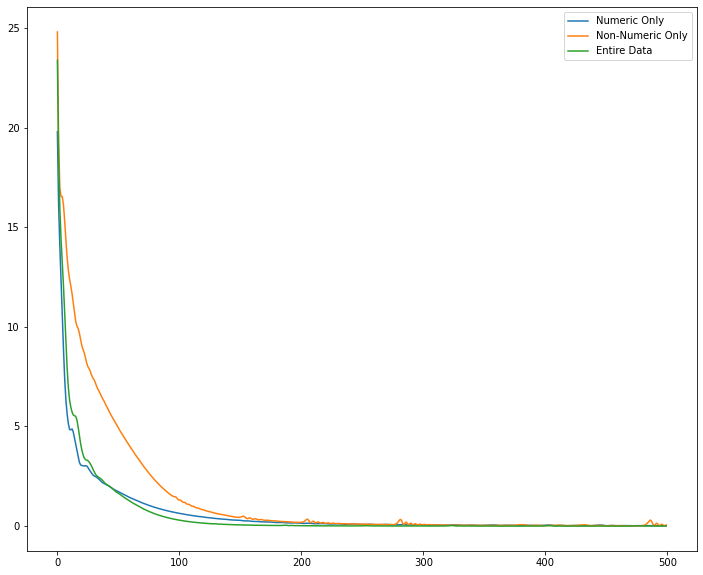

In [88]:
plt.figure(figsize=(12, 10))
plt.plot(range(len(losses4)), losses4, label = 'Numeric Only')
plt.plot(range(len(losses5)), losses5, label = 'Non-Numeric Only')
plt.plot(range(len(losses6)), losses6, label = 'Entire Data')

plt.legend(loc='upper right')
plt.show()

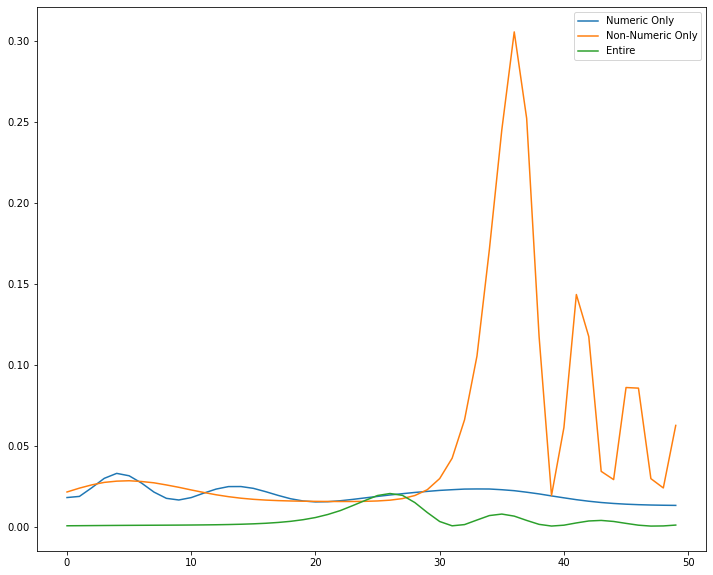

In [89]:
plt.figure(figsize=(12, 10))
plt.plot(range(len(losses4[-50:])), losses4[-50:], label = 'Numeric Only')
plt.plot(range(len(losses5[-50:])), losses5[-50:], label = 'Non-Numeric Only')
plt.plot(range(len(losses6[-50:])), losses6[-50:], label = 'Entire')

plt.legend(loc='upper right')
plt.show()

In [90]:
# 从上面两个图可以看出使用了全部数据的模型训练同样的次数 最终的损失更小 并且波动也更小

In [92]:
# 预测结果
raw_test_data = pd.read_csv('./data/kaggle_house/test.csv')

In [93]:
raw_test_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [94]:
raw_test_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [95]:
test_x = DataFrame(raw_test_data)
test_x = test_x.drop(columns=['Id'])# 去除Id列

In [96]:
for col in numeric_x_columns:
    test_x[col].fillna(0)# 将缺失值设为0

In [98]:
for col in non_numeric_columns:
    test_x[col] = test_x[col].fillna('N/A')

In [99]:
test_x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,N/A,Reg,Lvl,AllPub,Inside,...,120,0,N/A,MnPrv,N/A,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,N/A,IR1,Lvl,AllPub,Corner,...,0,0,N/A,N/A,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,N/A,IR1,Lvl,AllPub,Inside,...,0,0,N/A,MnPrv,N/A,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,N/A,IR1,Lvl,AllPub,Inside,...,0,0,N/A,N/A,N/A,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,N/A,IR1,HLS,AllPub,Inside,...,144,0,N/A,N/A,N/A,0,1,2010,WD,Normal


In [100]:
# string替换为int 和之前编辑训练数据一样
for col in mapping_table.keys():
    curr_mapping_table = mapping_table[col]
    for k, v in curr_mapping_table.items():
        test_x[col] = test_x[col].replace(k, v)

In [101]:
test_x.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,5,80.0,11622,1,1,1,1,1,1,...,120,0,1,2,1,0,6,2010,1,1
1,20,1,81.0,14267,1,1,2,1,1,3,...,0,0,1,1,3,12500,6,2010,1,1
2,60,1,74.0,13830,1,1,2,1,1,1,...,0,0,1,2,1,0,3,2010,1,1
3,60,1,78.0,9978,1,1,2,1,1,1,...,0,0,1,1,1,0,6,2010,1,1
4,120,1,43.0,5005,1,1,2,4,1,1,...,144,0,1,1,1,0,1,2010,1,1
5,60,1,75.0,10000,1,1,2,1,1,3,...,0,0,1,1,1,0,4,2010,1,1
6,20,1,NaN,7980,1,1,2,1,1,1,...,0,0,1,4,2,500,3,2010,1,1
7,60,1,63.0,8402,1,1,2,1,1,1,...,0,0,1,1,1,0,5,2010,1,1
8,20,1,85.0,10176,1,1,1,1,1,1,...,0,0,1,1,1,0,2,2010,1,1
9,20,1,70.0,8400,1,1,1,1,1,3,...,0,0,1,2,1,0,4,2010,1,1


In [102]:
unreplaced_columns = []

for col in test_x.columns:
    if 'N/A' in pd.unique(test_x[col]):
        unreplaced_columns.append(col)
        
print(unreplaced_columns)

['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Functional', 'SaleType']


<ipython-input-102-14a393f657b9>:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'N/A' in pd.unique(test_x[col]):


In [115]:
for col in unreplaced_columns:
    test_x[col] = test_x[col].replace('N/A', 0)

In [116]:
for col in test_x.columns:
    test_x[col] = (test_x[col] - means[col]) / (maxs[col] - mins[col])

In [117]:
test_y = model6(torch.tensor(test_x.values, dtype=torch.float))

In [118]:
result = DataFrame(test_y.data.numpy(), columns=['SalePrice'])

In [119]:
result['SalePrice'] = result['SalePrice'].fillna(0)

In [120]:
result['SalePrice'] = result['SalePrice'] * (maxs['SalePrice'] - mins['SalePrice']) + means['SalePrice']

In [121]:
result['Id'] = np.array(result.index)

In [122]:
result['Id'] = result['Id'] + 1461

In [123]:
result = DataFrame(result, columns=['Id', 'SalePrice'])

In [124]:
result.describe()

,Id,SalePrice
count,1459.000000,1459.000000
mean,2190.000000,174566.656939
std,421.321334,37418.014096
min,1461.000000,91593.338987
25%,1825.500000,149657.108304
50%,2190.000000,179737.753582
75%,2554.500000,186030.733100
max,2919.000000,443229.727789


In [125]:
result.to_csv('./data/kaggle_house/submission.csv', columns=['Id', 'SalePrice'], index=False)